In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = './data/IRIS.csv'

raw = pd.read_csv(file)
raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


data를 서로 구분할 수 있도록 unique한 컬럼인 id를 추가한다.

In [6]:
raw['species'].unique()
raw['id'] = range(len(raw))
raw

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,145
146,6.3,2.5,5.0,1.9,Iris-virginica,146
147,6.5,3.0,5.2,2.0,Iris-virginica,147
148,6.2,3.4,5.4,2.3,Iris-virginica,148


## 2.kNN 실습

In [7]:
train = raw.sample(100, replace=False, random_state=42)

In [9]:
train = train.reset_index(drop=True)
train

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,6.1,2.8,4.7,1.2,Iris-versicolor,73
1,5.7,3.8,1.7,0.3,Iris-setosa,18
2,7.7,2.6,6.9,2.3,Iris-virginica,118
3,6.0,2.9,4.5,1.5,Iris-versicolor,78
4,6.8,2.8,4.8,1.4,Iris-versicolor,76
...,...,...,...,...,...,...
95,5.5,2.5,4.0,1.3,Iris-versicolor,89
96,4.4,2.9,1.4,0.2,Iris-setosa,8
97,4.3,3.0,1.1,0.1,Iris-setosa,13
98,6.0,2.2,5.0,1.5,Iris-virginica,119


In [12]:
#train에 포함되지 않은 값들을 뽑는다.
test = raw.loc[~raw['id'].isin(train['id'])]
test = test.reset_index(drop=True)
test

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,4.9,3.0,1.4,0.2,Iris-setosa,1
1,4.7,3.2,1.3,0.2,Iris-setosa,2
2,4.6,3.1,1.5,0.2,Iris-setosa,3
3,4.6,3.4,1.4,0.3,Iris-setosa,6
4,5.8,4.0,1.2,0.2,Iris-setosa,14
5,5.1,3.5,1.4,0.3,Iris-setosa,17
6,5.4,3.4,1.7,0.2,Iris-setosa,20
7,5.1,3.7,1.5,0.4,Iris-setosa,21
8,4.9,3.1,1.5,0.1,Iris-setosa,37
9,4.4,3.0,1.3,0.2,Iris-setosa,38


### kNN 학습(분류)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,6.1,2.8,4.7,1.2,Iris-versicolor,73
1,5.7,3.8,1.7,0.3,Iris-setosa,18
2,7.7,2.6,6.9,2.3,Iris-virginica,118
3,6.0,2.9,4.5,1.5,Iris-versicolor,78
4,6.8,2.8,4.8,1.4,Iris-versicolor,76


In [19]:
input_col = ['sepal_length','sepal_width','petal_length','petal_width']
knn.fit(train[input_col],train['species'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
predict = knn.predict(test[input_col])
test['pred'] = predict

In [23]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id,pred
0,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa,2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa,3,Iris-setosa
3,4.6,3.4,1.4,0.3,Iris-setosa,6,Iris-setosa
4,5.8,4.0,1.2,0.2,Iris-setosa,14,Iris-setosa


In [26]:
(test['species']==test['pred']).mean()

0.96

### k를 탐색하기

In [29]:
results = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)

    train.head()

    input_col = ['sepal_length','sepal_width','petal_length','petal_width']
    knn.fit(train[input_col],train['species'])

    predict = knn.predict(test[input_col])
    test['pred'] = predict
    results.append((test['species']==test['pred']).mean())

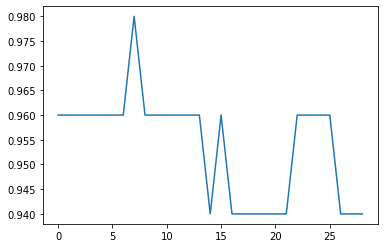

In [33]:
plt.plot(results)

### kNN (회귀)

In [34]:
del train['species']
del test['species']

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor(n_neighbors=3)

In [37]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,id
0,6.1,2.8,4.7,1.2,73
1,5.7,3.8,1.7,0.3,18
2,7.7,2.6,6.9,2.3,118
3,6.0,2.9,4.5,1.5,78
4,6.8,2.8,4.8,1.4,76


In [38]:
input_col = ['sepal_length','sepal_width','petal_length']
knn.fit(train[input_col],train['petal_width'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [40]:
test['pred'] = knn.predict(test[input_col])
test

,sepal_length,sepal_width,petal_length,petal_width,id,pred
0,4.9,3.0,1.4,0.2,1,0.166667
1,4.7,3.2,1.3,0.2,2,0.200000
2,4.6,3.1,1.5,0.2,3,0.200000
3,4.6,3.4,1.4,0.3,6,0.200000
4,5.8,4.0,1.2,0.2,14,0.333333
5,5.1,3.5,1.4,0.3,17,0.233333
6,5.4,3.4,1.7,0.2,20,0.366667
7,5.1,3.7,1.5,0.4,21,0.233333
8,4.9,3.1,1.5,0.1,37,0.133333
9,4.4,3.0,1.3,0.2,38,0.166667


In [45]:
mae = abs(test['petal_width']-test['pred']).sum()/len(test)
mae

0.15533333333333332

### 최적의 k 찾기

In [46]:
results = []
for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k)

    input_col = ['sepal_length','sepal_width','petal_length']
    knn.fit(train[input_col],train['petal_width'])

    test['pred'] = knn.predict(test[input_col])

    mae = abs(test['petal_width']-test['pred']).sum()/len(test)
    results.append(mae)

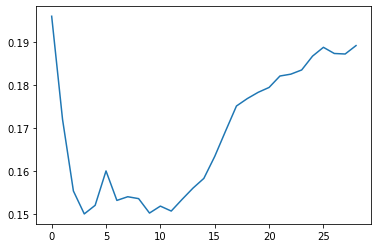

In [47]:
plt.plot(results)